In [13]:
import pandas as pd
import numpy as np
import sys

sys.path.insert(0, r'D:\Shelton\Machine Learning\Projects\HousePricePrediction')

from src.data_ingestor import DataIngestorFactory, ZipDataIngestor
from analysis_src.data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis_src.missing_value_analysis import MissingValueAnalysis


In [15]:
file_path = r'D:\Shelton\Machine Learning\Projects\HousePricePrediction\Data\archive.zip'
file_ext = file_path.split('.')[-1]
ingestor = DataIngestorFactory.get_data_ingestor(file_ext)
data = ingestor.ingest(file_path)

In [16]:
inspector = DataInspector(DataTypesInspectionStrategy())
inspector.execute_inspection(data)

Data Types and Non-Null Counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

In [17]:
inspector = DataInspector(SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(data)

Summary Statistics of Numerical Features
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904   

In [18]:
missing_value_analyer = MissingValueAnalysis()
missing_value_analyer.identify_missing_values(data)


Missing Values by Columns
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


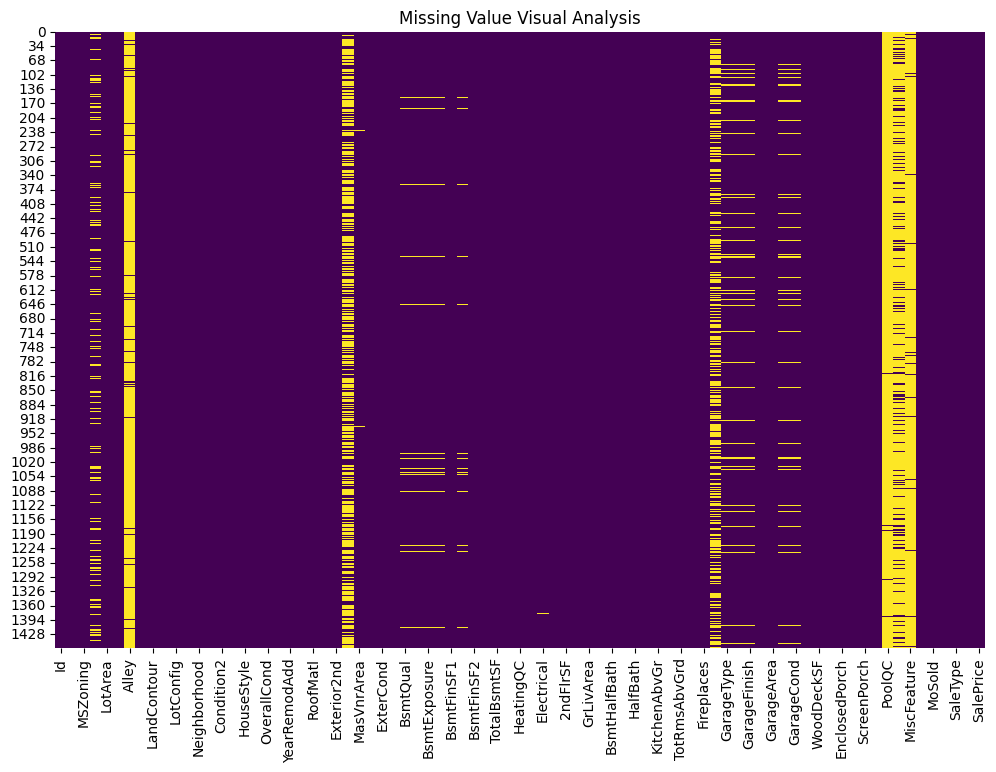

In [19]:
missing_value_analyer.visualize_missing_values(data)

d:\Shelton\Machine Learning\Projects\HousePricePrediction\analysis\analysis_src\univariate_analysis.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = df, palette='muted')


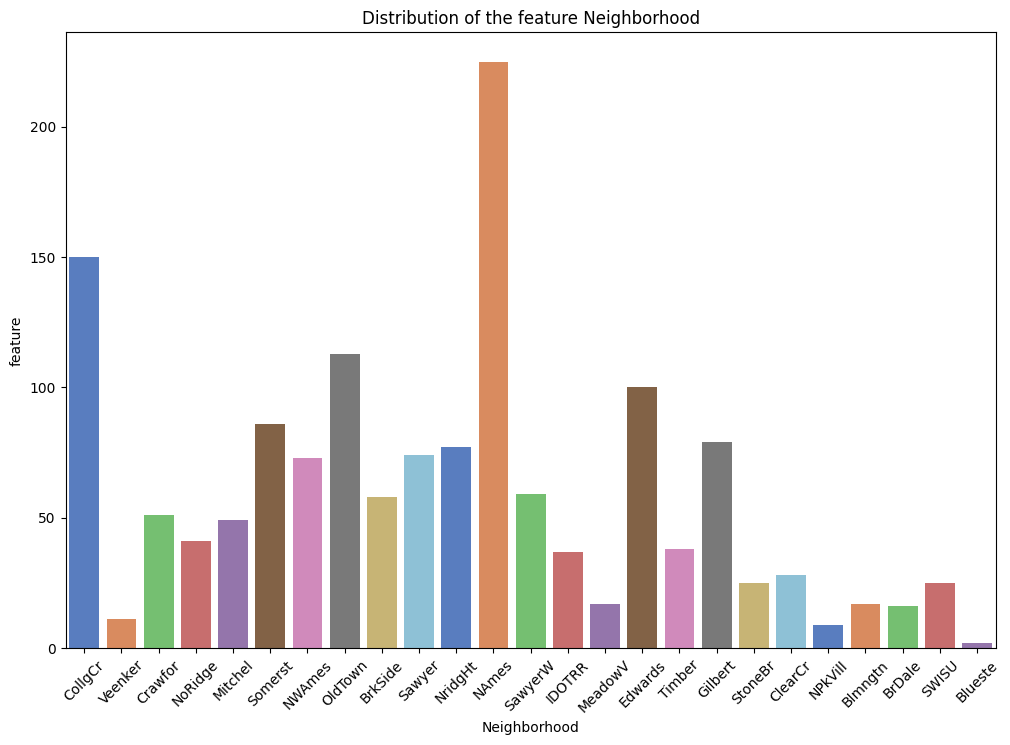

In [21]:
from analysis_src.univariate_analysis import UnivariateAnalyzer, CategoricalUnivariateAnalysis, NumericalUnivariateAnalysis

uni_analyzer = UnivariateAnalyzer(CategoricalUnivariateAnalysis())
uni_analyzer.execute_strategy(data, 'Neighborhood')

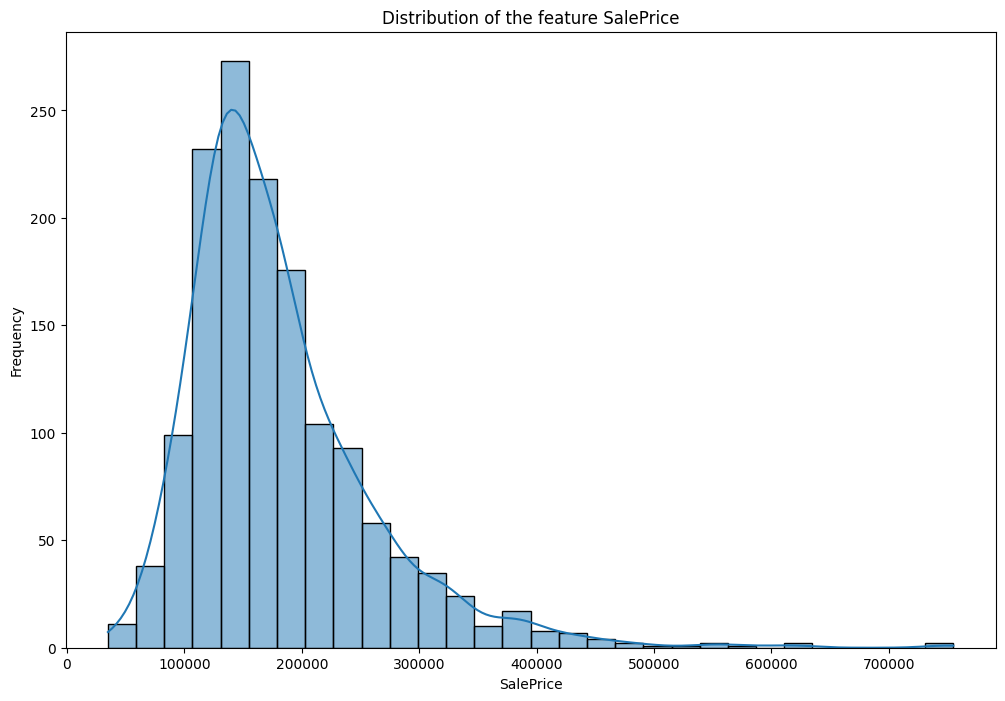

In [25]:
uni_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
uni_analyzer.execute_strategy(data, 'SalePrice')

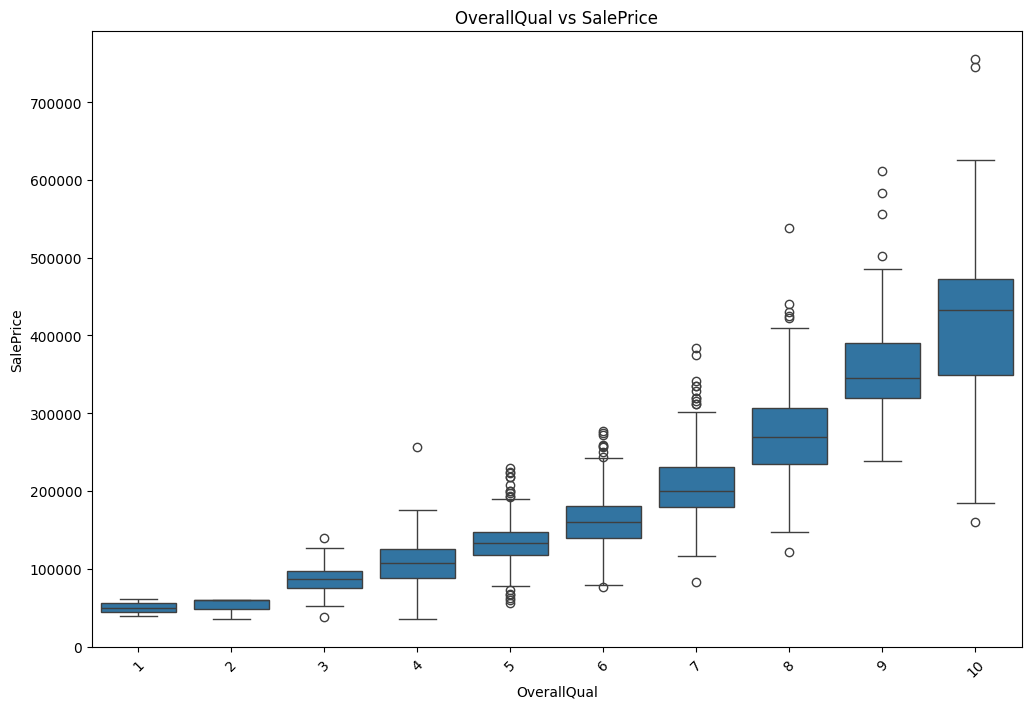

In [29]:
from analysis_src.bivariate_analysis import BivariateAnalyzer, NumericalBivariateAnalysis, CategoricalBivariateAnalysis

bi_analyzer = BivariateAnalyzer(CategoricalBivariateAnalysis())
bi_analyzer.execute_strategy(data, 'OverallQual', 'SalePrice' )

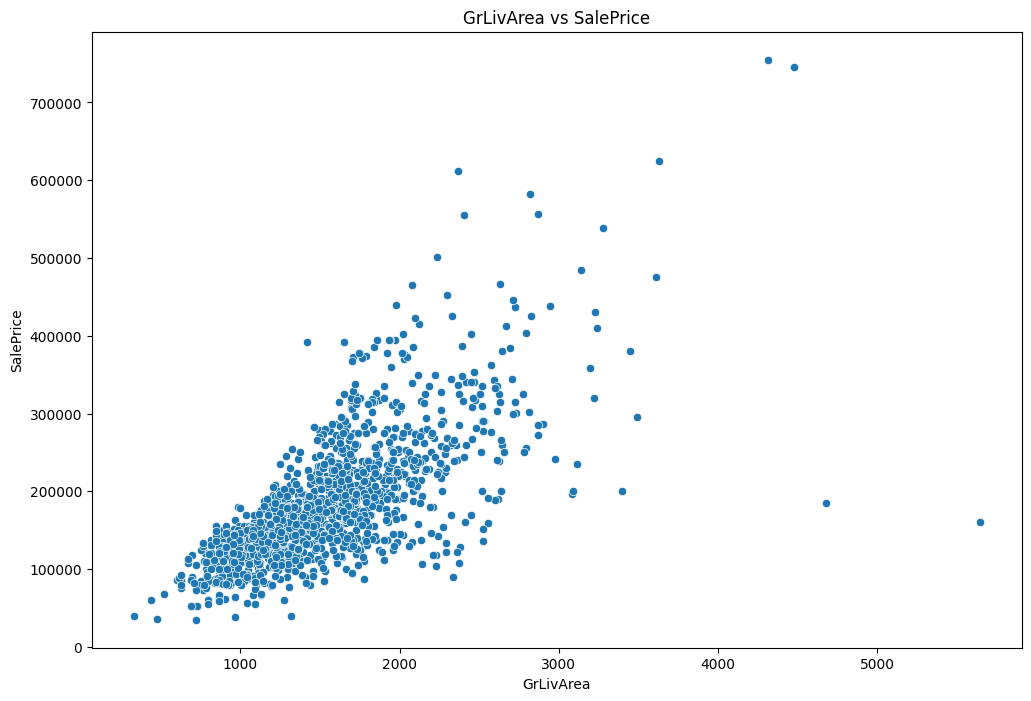

In [30]:
bi_analyzer.set_strategy(NumericalBivariateAnalysis())
bi_analyzer.execute_strategy(data, 'GrLivArea', 'SalePrice' )

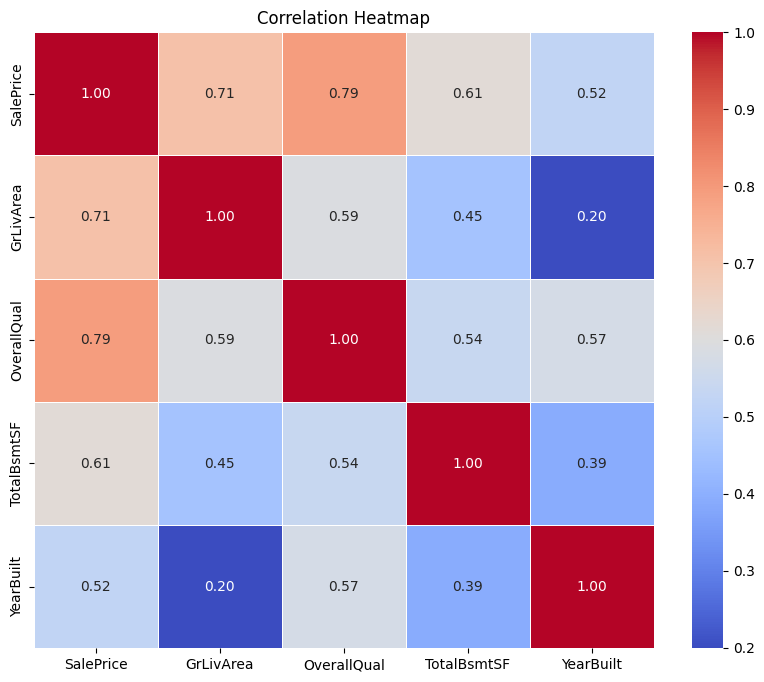

In [41]:
from analysis_src.multivariate_analysis import MultivariateAnalyzer, GenerateHeatMap, GeneratePairPlot
multi_analyzer = MultivariateAnalyzer(GenerateHeatMap())
multi_analyzer.execute_plot(data[['SalePrice','GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']])

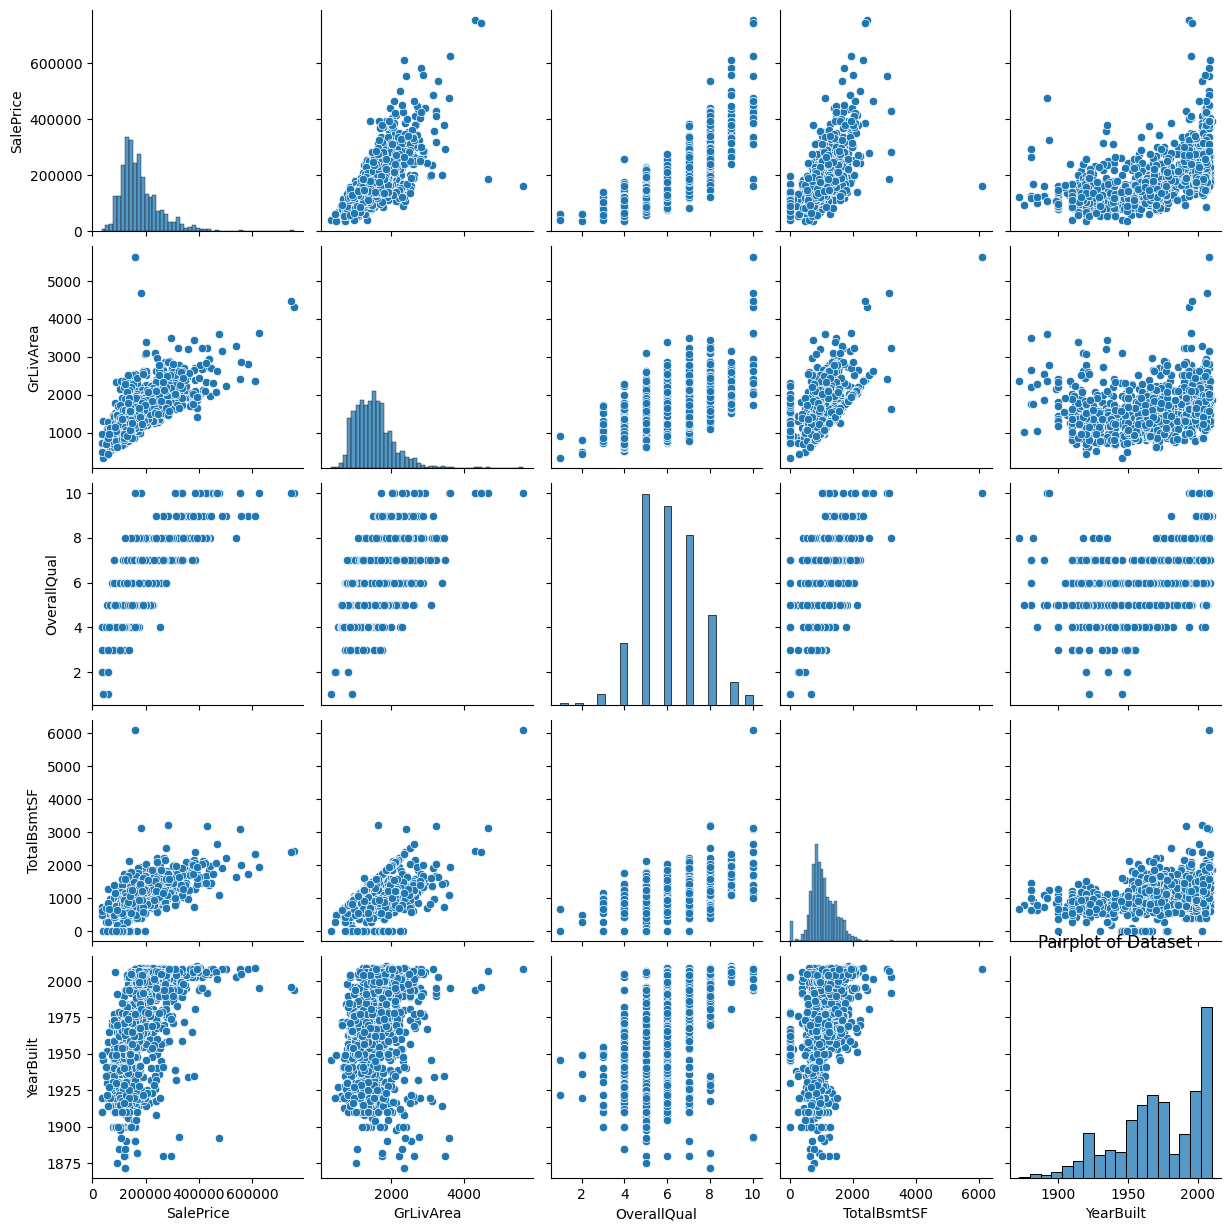

In [42]:
multi_analyzer.set_plot(GeneratePairPlot())
multi_analyzer.execute_plot(data[['SalePrice','GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']])